# T10 Nonlinear regression

In today's tutorial, we will use the data on yearly wages (in dollars) data for US male workers collected from the Current Population Survey in 1988. It contains 3000 data-points.

In this tutorial, we will focus on the relationship between response variable wage and prediction variable age. The two-dimensional relationship is easier to present and allows us to better illustrate the different regression methods. 


#### 1. Loading and visualiztion of the data

The wage data is saved in the numpy file `Wages.npy`. Load the file (using `np.load()`) and visualize the data. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
# your code goes here 

#### 2. Generate train and test data-sets

We start by splitting the data into random **training** and **testing subsets**. The regression models will be fitted using the traning subset, while the testing data will be used to evaluate the respective model and compare different regression methods. Scikit-learn provides a function for exactly that purpose, i.e., splitting the data into a traning and a test subset : `train_test_split(x,y,test_size=[fraction],random_state=[integer])`.


In [4]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

#### 3. Linear regression

Linear regression is the simplest and most widely used statistical technique for predictive modelling. It is called a linear model as it establishes a linear relationship between the dependent and independent variables. For linear regression, one can use the `LinearRegression()` function provided by scikit-learn library. However, here we will fit a 1st-order polyonomial function (a line) to the data using the numpy `np.polyfit(x,y,order)` function to fit the model, and `np.poly1d()` to generate the model instance. 

In [6]:
# your code goes here

#### 4. Polynomial regression

Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables $X^1$, $X^2$, $X^3$, as predictors. This approach provides a simple way to provide a non-linear fit to data.

In [7]:
# your code goes here 

#### 5. Cubic splines

Cubic spline is a piecewise polynomial with a set of extra constraints (continuity, continuity of the first derivative, and continuity of the second derivative). In general, a cubic spline with K knots uses cubic spline with a total of 4 + K degrees of freedom. There is seldom any good reason to go beyond cubic-splines (unless one is interested in smooth derivatives).

In [1]:
# custom installation for deepnote 
# !pip install patsy
# !pip install statsmodels

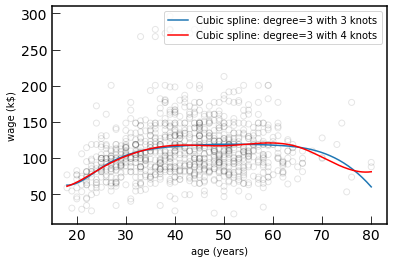

In [118]:
from patsy import dmatrix  # patsy 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred_test1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60),degree=3, include_intercept=False)", {"valid": test_x}, return_type='dataframe'))
pred_test2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": test_x}, return_type='dataframe'))


# We will plot the graph for 70 observations only
xp = np.linspace(test_x.min(),test_x.max(),200)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60),degree=3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Cubic spline: degree=3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Cubic spline: degree=3 with 4 knots')
plt.legend(loc=1)
plt.xlabel('age (years)')
plt.ylabel('wage (k$)')
plt.show()

#### 6. Natural cubic spline

We know that the behavior of polynomials that are fit to the data tends to be erratic near the boundaries. Such variability can be dangerous. These problems are resembled by splines, too. The polynomials fit beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline. Natural Spline impose that the fitted function becomes linear at edgdes, i.e., at very low and large X values. 

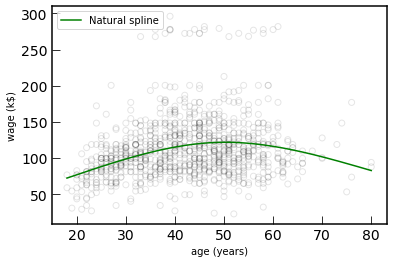

In [106]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
#transformed_x3 = dmatrix("cr(train, knots=(25,40,60))", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": test_x}, return_type='dataframe'))
#pred3 = fit3.predict(dmatrix("cr(valid, knots=(25,40,60))", {"valid": test_x}, return_type='dataframe'))
# Calculating RMSE value
#rms = np.sqrt(mean_squared_error(test_y, pred3))
#print(rms)
#-> 39.44

# We will plot the graph for 70 observations only
xp = np.linspace(test_x.min(),test_x.max(),200)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))
#pred3 = fit3.predict(dmatrix("cr(xp, knots=(25,40,60))", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()

plt.xlabel('age (years)')
plt.ylabel('wage (k$)')
plt.show()

## The end